In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/external/AMZN.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300
1,2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400
2,2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300
3,2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100
4,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,136.827619,138.376508,135.384484,136.964127,136.964127,5.317284e+07
std,20.961057,21.037739,20.950182,21.051427,21.051427,1.910424e+07
min,98.070000,98.300003,96.290001,97.239998,97.239998,2.237840e+07
25%,125.730001,127.392502,124.219999,125.980003,125.980003,4.228202e+07
50%,134.065002,135.814995,133.215004,134.679993,134.679993,4.938505e+07
75%,148.585003,150.690006,147.962506,149.307503,149.307503,5.881808e+07
max,179.990005,181.419998,178.149994,178.869995,178.869995,1.529387e+08


In [10]:
df_v1 = df.copy()

In [12]:
df_v1['Date'] = pd.to_datetime(df_v1['Date'], format='%Y-%m-%d')
df_v1 = df_v1.set_index(['Date'])
df_v1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300


In [13]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-03-23 to 2024-03-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


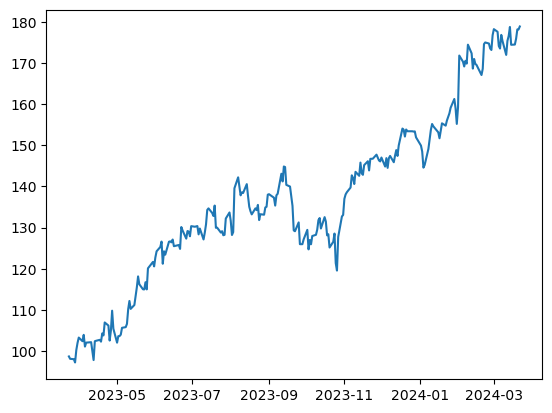

In [17]:
plt.plot(df_v1['Close'])

##### Stationarity

In [48]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [39]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [40]:
perform_adf_test(df_v1['Close'])

ADF Statistic: -0.585863
p-value: 0.874144


##### ACF

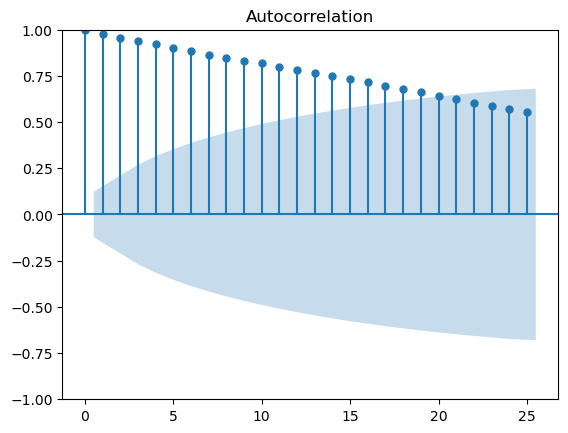

In [64]:
acf_plot = plot_acf(df_v1['Close'])

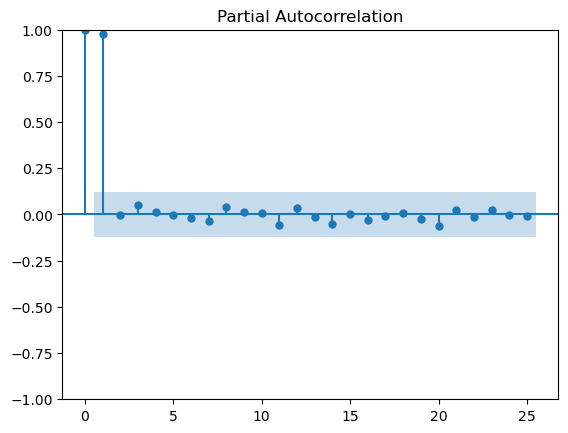

In [54]:
pacf_plot = plot_pacf(df_v1['Close'])

In [56]:
first_diffs = df_v1['Close'].values[1:] - df_v1['Close'].values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [57]:
df_v1['FirstDifference'] = first_diffs

In [58]:
df_v1.head()

,Open,High,Low,Close,Adj Close,Volume,FirstDifference
Date,,,,,,,
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300,-0.580002
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400,-0.089996
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300,-0.800003
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100,3.010002
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,1.750000


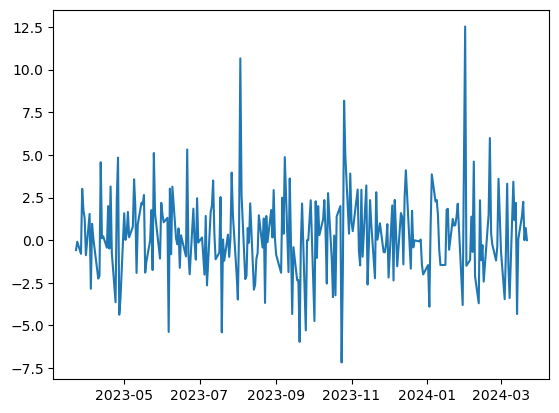

In [59]:
plt.plot(df_v1['FirstDifference'])

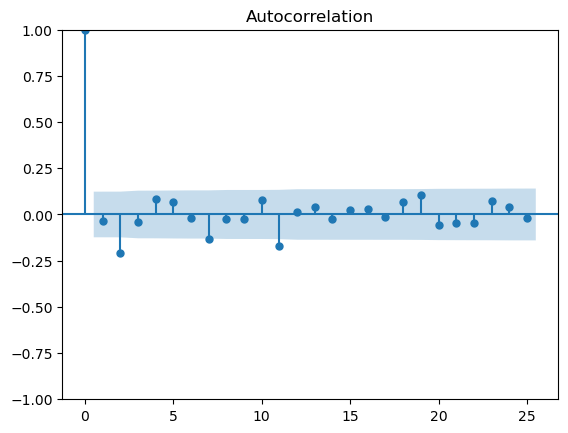

In [60]:
acf_plot = plot_acf(df_v1['FirstDifference'])

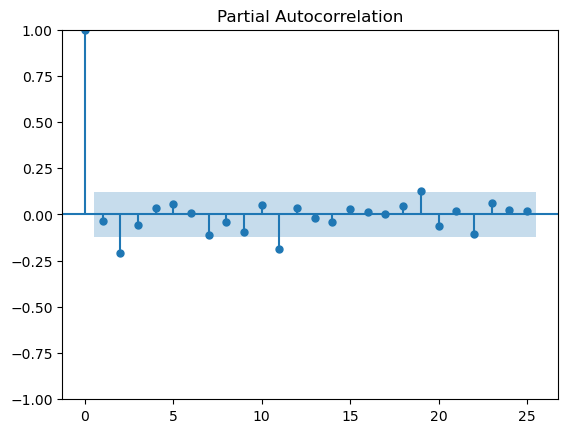

In [62]:
pcf_plot = plot_pacf(df_v1['FirstDifference'])

In [63]:
perform_adf_test(df_v1['FirstDifference'])

ADF Statistic: -14.000483
p-value: 0.000000


In [66]:
df_v1

,Open,High,Low,Close,Adj Close,Volume,FirstDifference
Date,,,,,,,
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300,-0.580002
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400,-0.089996
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300,-0.800003
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100,3.010002
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,1.750000
...,...,...,...,...,...,...,...
2024-03-18,175.800003,176.690002,174.279999,174.479996,174.479996,31250700,1.419998
2024-03-19,174.220001,176.089996,173.520004,175.899994,175.899994,26880900,2.250000
2024-03-20,176.139999,178.529999,174.639999,178.149994,178.149994,29947200,0.000000


In [91]:
split_date = pd.to_datetime('2024-01-01',format='%Y-%m-%d')
train_df = df_v1[df_v1.index < split_date]
test_df = df_v1[df_v1.index >= split_date]

In [93]:
test_df

,Open,High,Low,Close,Adj Close,Volume,FirstDifference
Date,,,,,,,
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400,-1.459992
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500,-3.899994
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800,0.669998
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800,3.860001
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,2.269989
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,2.360001
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800,1.449997
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700,-0.559998
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300,-1.459991


##### AR model

In [108]:
from statsmodels.tsa.arima.model import ARIMA

In [109]:
model = ARIMA(train_df['FirstDifference'], order=(1,0,0))

C:\Users\KUDIPUDI\.conda\envs\dsEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KUDIPUDI\.conda\envs\dsEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KUDIPUDI\.conda\envs\dsEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [110]:
model_fit = model.fit()

In [111]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        FirstDifference   No. Observations:                  195
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -448.422
Date:                Sun, 24 Mar 2024   AIC                            902.845
Time:                        18:01:50   BIC                            912.664
Sample:                             0   HQIC                           906.821
                                - 195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2638      0.162      1.624      0.104      -0.055       0.582
ar.L1         -0.0752      0.068     -1.104      0.270      -0.209       0.058
sigma2         5.8199      0.432     13.473      0.000       4.973       6.667
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                28.07
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.25
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
pred_start_date = pd.to_datetime(test_df.index[0], format='%Y-%m-%d')
pred_end_date = test_df.index[5]
pred_start_date

Timestamp('2024-01-02 00:00:00')

In [113]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_df - predictions

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'